In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

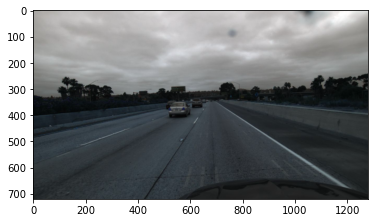

In [160]:
src = cv2.imread('040.jpg')
lane = np.copy(src)
plt.imshow(src)
plt.show()

In [161]:
low_threshold = 50
high_threshold = 150
def canny (image):
    # 1. convert to grey scale
    gray = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
    # 2. reduce noise
    gray_gaussian = cv2.GaussianBlur(gray,(5,5),0)
    # canny(edge detection) : measure adjacent changes in intensity in all directions
    canny = cv2.Canny(gray_gaussian,low_threshold,high_threshold)
    plt.imshow(canny)
    plt.show()
    return canny

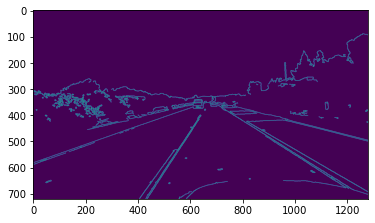

In [162]:
canny = canny(lane)

In [163]:
# identify lane lines
def region(img):
    #draw interested region
    h = img.shape[0]
    w = img.shape[1]
    polygons = np.array([[(0,500),(w,h),(600,275)]
                        ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

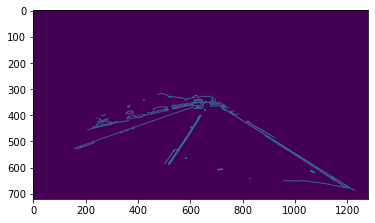

In [164]:
bitwise_img = region(canny)
plt.imshow(bitwise_img)
plt.show()

[[770 401 960 520]]
[[155 527 331 466]]
[[ 930  506 1006  555]]
[[516 588 609 449]]
[[1003  552 1161  654]]
[[1002  547 1152  641]]
[[567 518 634 416]]
[[438 429 510 403]]
[[ 728  376 1038  569]]
[[821 426 902 474]]
[[286 481 470 417]]


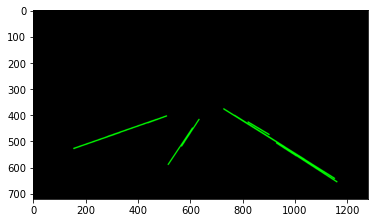

In [171]:
# Hough transform : identify straight lines
lines = cv2.HoughLinesP(bitwise_img,2,np.pi/180,100,np.array([]),70, 2)

def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            print(line)
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),3)
    return line_image
    
line_image = display_lines(lane,lines)
plt.imshow(line_image)

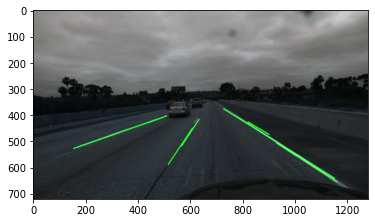

In [172]:
combo = cv2.addWeighted(lane,0.8,line_image,1,0)
plt.imshow(combo)
plt.show()